In [1]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 69 kB/s 
     |████████████████████████████████| 198 kB 49.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=34eb0d354d326d928117bbcb231fa8b8f486ba69549089057fbf0d995240b143
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [3]:
from google.colab import files
uploaded2 = files.upload()

Saving True.csv to True.csv


In [4]:
import io
import pandas as pd
fake = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))
true = pd.read_csv(io.BytesIO(uploaded2['True.csv']))

In [5]:
# create new columns in each to store the value of articles realness
true['is_fake'] = 0 # contains only news
fake['is_fake'] = 1 # contains only fakes

In [7]:
data = pd.concat([true, fake])
data = data.reset_index()
data = data.sample(frac=1)
data.head()

index  ... is_fake
34816  13399  ...       1
44065  22648  ...       1
28695   7278  ...       1
36678  15261  ...       1
44129  22712  ...       1

[5 rows x 6 columns]

In [8]:
data = data.drop(['date', 'index'], axis = 1)
data.reset_index(drop = True)
data.head()

title  ... is_fake
34816  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...  ...       1
44065  BOILER ROOM – EP #46 – Murder, Witchery, Polit...  ...       1
28695   WATCH: Bill Maher Doesn’t Believe Five Women ...  ...       1
36678  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...  ...       1
44129  CLOAKED IN CONSPIRACY: Overview of JFK Files R...  ...       1

[5 rows x 4 columns]

In [9]:
data['text'] = data['title'] + " " + data['text']
data.head()

title  ... is_fake
34816  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...  ...       1
44065  BOILER ROOM – EP #46 – Murder, Witchery, Polit...  ...       1
28695   WATCH: Bill Maher Doesn’t Believe Five Women ...  ...       1
36678  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...  ...       1
44129  CLOAKED IN CONSPIRACY: Overview of JFK Files R...  ...       1

[5 rows x 4 columns]

In [10]:
data = data.drop(['title'], axis=1)
data

text       subject  is_fake
34816  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...      politics        1
44065  BOILER ROOM – EP #46 – Murder, Witchery, Polit...       US_News        1
28695   WATCH: Bill Maher Doesn’t Believe Five Women ...          News        1
36678  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...      politics        1
44129  CLOAKED IN CONSPIRACY: Overview of JFK Files R...   Middle-east        1
...                                                  ...           ...      ...
11066  Data privacy bill in Congress, trans-Atlantic ...  politicsNews        0
10670  Factbox: The race to the U.S. presidential nom...  politicsNews        0
33065  COLLEGE STUDENT’S UNDERCOVER VIDEO GETS HIM SU...      politics        1
10068  Pentagon chief wants streamlined, more nimble ...  politicsNews        0
29531   INSANE Bundy Supporter: Conservatives Ready T...          News        1

[44898 rows x 3 columns]

In [27]:
cloudtext = ' '.join(data['text'].tolist())

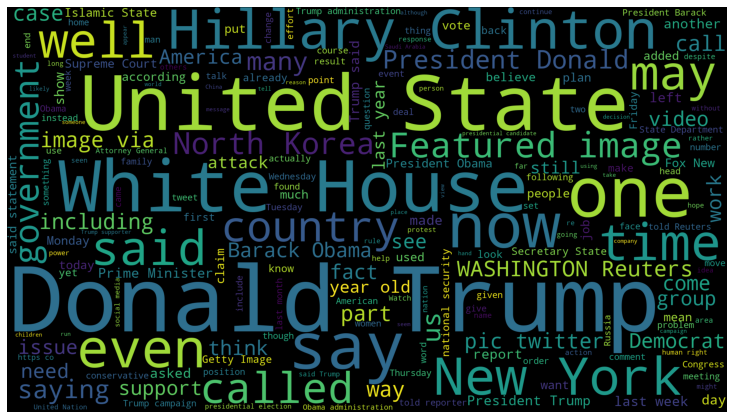

In [28]:
wordcloud = WordCloud(width=1920, height=1080).generate(cloudtext)
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
data = data.drop(['subject'], axis =1)
data

text  is_fake
34816  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...        1
44065  BOILER ROOM – EP #46 – Murder, Witchery, Polit...        1
28695   WATCH: Bill Maher Doesn’t Believe Five Women ...        1
36678  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...        1
44129  CLOAKED IN CONSPIRACY: Overview of JFK Files R...        1
...                                                  ...      ...
11066  Data privacy bill in Congress, trans-Atlantic ...        0
10670  Factbox: The race to the U.S. presidential nom...        0
33065  COLLEGE STUDENT’S UNDERCOVER VIDEO GETS HIM SU...        1
10068  Pentagon chief wants streamlined, more nimble ...        0
29531   INSANE Bundy Supporter: Conservatives Ready T...        1

[44898 rows x 2 columns]

In [12]:
data = data.reindex(columns= ['is_fake', 'text'])
data

is_fake                                               text
34816        1  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...
44065        1  BOILER ROOM – EP #46 – Murder, Witchery, Polit...
28695        1   WATCH: Bill Maher Doesn’t Believe Five Women ...
36678        1  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...
44129        1  CLOAKED IN CONSPIRACY: Overview of JFK Files R...
...        ...                                                ...
11066        0  Data privacy bill in Congress, trans-Atlantic ...
10670        0  Factbox: The race to the U.S. presidential nom...
33065        1  COLLEGE STUDENT’S UNDERCOVER VIDEO GETS HIM SU...
10068        0  Pentagon chief wants streamlined, more nimble ...
29531        1   INSANE Bundy Supporter: Conservatives Ready T...

[44898 rows x 2 columns]

In [13]:
df = data.rename(columns={'is_fake': 'class'})
df

class                                               text
34816      1  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...
44065      1  BOILER ROOM – EP #46 – Murder, Witchery, Polit...
28695      1   WATCH: Bill Maher Doesn’t Believe Five Women ...
36678      1  TRUMP POSTS MESSAGE ON INSTAGRAM FROM BARBARA ...
44129      1  CLOAKED IN CONSPIRACY: Overview of JFK Files R...
...      ...                                                ...
11066      0  Data privacy bill in Congress, trans-Atlantic ...
10670      0  Factbox: The race to the U.S. presidential nom...
33065      1  COLLEGE STUDENT’S UNDERCOVER VIDEO GETS HIM SU...
10068      0  Pentagon chief wants streamlined, more nimble ...
29531      1   INSANE Bundy Supporter: Conservatives Ready T...

[44898 rows x 2 columns]

In [14]:
from pyspark.sql import SparkSession
spark  = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(df) 
sparkDF.printSchema()
sparkDF.show()


root
 |-- class: long (nullable = true)
 |-- text: string (nullable = true)

+-----+--------------------+
|class|                text|
+-----+--------------------+
|    1|DINESH D’SOUZA BR...|
|    1|BOILER ROOM – EP ...|
|    1| WATCH: Bill Mahe...|
|    1|TRUMP POSTS MESSA...|
|    1|CLOAKED IN CONSPI...|
|    1|YOU’LL NEVER GUES...|
|    1|In the Age of Ama...|
|    1| Lesbian Couple I...|
|    0|Obama, ASEAN disc...|
|    1|WOW! HILLARY PRET...|
|    0|Zimbabwe's Mugabe...|
|    0|Former Illinois G...|
|    0|France paying clo...|
|    0|Former guerrilla ...|
|    0|Clinton targets y...|
|    1|FLASHBACK: SPY WH...|
|    1|Who do you think ...|
|    1|MASS EXODUS FROM ...|
|    1| Trump Admits He ...|
|    0|Egged off: EU sum...|
+-----+--------------------+
only showing top 20 rows



In [15]:
from pyspark.sql.functions import length
data_df = sparkDF.withColumn('length', length(sparkDF['text']))
data_df.show()

+-----+--------------------+------+
|class|                text|length|
+-----+--------------------+------+
|    1|DINESH D’SOUZA BR...|   421|
|    1|BOILER ROOM – EP ...|  1417|
|    1| WATCH: Bill Mahe...|  1537|
|    1|TRUMP POSTS MESSA...|   251|
|    1|CLOAKED IN CONSPI...| 36201|
|    1|YOU’LL NEVER GUES...|  2019|
|    1|In the Age of Ama...|  3228|
|    1| Lesbian Couple I...|  2053|
|    0|Obama, ASEAN disc...|  3937|
|    1|WOW! HILLARY PRET...|  1466|
|    0|Zimbabwe's Mugabe...|  3296|
|    0|Former Illinois G...|  2042|
|    0|France paying clo...|  1342|
|    0|Former guerrilla ...|  1737|
|    0|Clinton targets y...|  2564|
|    1|FLASHBACK: SPY WH...|  3376|
|    1|Who do you think ...|   517|
|    1|MASS EXODUS FROM ...|  1141|
|    1| Trump Admits He ...|  1978|
|    0|Egged off: EU sum...|  1713|
+-----+--------------------+------+
only showing top 20 rows



In [16]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
# Create all the features to the data set
pos_neg_to_num = StringIndexer(inputCol='class',outputCol='label')
tokenizer = Tokenizer(inputCol="text", outputCol="token_text")
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
hashingTF = HashingTF(inputCol="stop_tokens", outputCol='hash_token')
idf = IDF(inputCol='hash_token', outputCol='idf_token')

In [17]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

# Create feature vectors
clean_up = VectorAssembler(inputCols=['idf_token', 'length'], outputCol='features')
clean_up

VectorAssembler_ca9346f5e610

In [18]:
# Create a and run a data processing Pipeline
from pyspark.ml import Pipeline
data_prep_pipeline = Pipeline(stages=[pos_neg_to_num, tokenizer, stopremove, hashingTF, idf, clean_up])

In [19]:
# Fit and transform the pipeline
cleaner = data_prep_pipeline.fit(data_df)
cleaned = cleaner.transform(data_df)
cleaned.head()

Row(class=1, text='DINESH D’SOUZA BRILLIANTLY Schools Hollywood Reporter On Why Racist Democrats Keep Minorities On The Plantation [VIDEO] If you haven t seen Dinesh D Souza s  HILLARY S AMERICA  yet, it is a MUST see! Watch here, as Dinesh explains why his historically correct movie casts the truth on the Democrats racist roots, discusses his time in prison and much more  THE SOUND STARTS AT THE 1:00 MARK WHEN D SOUZA BEGINS TO SPEAK: ', length=421, label=0.0, token_text=['dinesh', 'd’souza', 'brilliantly', 'schools', 'hollywood', 'reporter', 'on', 'why', 'racist', 'democrats', 'keep', 'minorities', 'on', 'the', 'plantation', '[video]', 'if', 'you', 'haven', 't', 'seen', 'dinesh', 'd', 'souza', 's', '', 'hillary', 's', 'america', '', 'yet,', 'it', 'is', 'a', 'must', 'see!', 'watch', 'here,', 'as', 'dinesh', 'explains', 'why', 'his', 'historically', 'correct', 'movie', 'casts', 'the', 'truth', 'on', 'the', 'democrats', 'racist', 'roots,', 'discusses', 'his', 'time', 'in', 'prison', 'an

In [20]:
# Show label and resulting features
cleaned.select(['label', 'features']).show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
from pyspark.ml.classification import NaiveBayes
# Break data down into a training set and a testing set
training, testing = cleaned.randomSplit([0.7, 0.3])

# Create a Naive Bayes model and fit training data
nb = NaiveBayes()
predictor = nb.fit(training)

In [22]:
# Tranform the model with the testing data
test_results = predictor.transform(testing)
test_results.show(5)

+-----+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|class|                text|length|label|          token_text|         stop_tokens|          hash_token|           idf_token|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|"It would be huge...|  6956|  1.0|["it, would, be, ...|["it, huge":, u.s...|(262144,[1272,230...|(262144,[1272,230...|(262145,[1272,230...|[-39013.436822568...|           [0.0,1.0]|       1.0|
|    0|"Nobody stood wit...|  1672|  1.0|["nobody, stood, ...|["nobody, stood, ...|(262144,[1921,256...|(262144,[1921,256...|(262145,[1921,256...|[-8357.8080333684...|   [2.0153E-320,1.0]|       1.0|


In [23]:
# Use the Class Evaluator for a cleaner description
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting Fake News was: %f" % acc)

Accuracy of model at predicting Fake News was: 0.981087
